In [1]:
import pandas as pd
import numpy as np

In [2]:
## custom library

import submission_config as subconfig
import submission_util as subutil

In [3]:
pd.set_option('display.float_format', lambda x: f'{x:,g}')

In [4]:
BASE_PATH = subconfig.BASE_PATH
DATA_PATH = subconfig.DATA_PATH

OUTPUT_PATH = subconfig.OUTPUT_PATH

In [5]:
import pandas as pd
import numpy as np

df1 = pd.read_csv(subconfig.OUTPUT_PATH / 'Final_JP.csv', index_col = 0)
df2 = pd.read_csv(subconfig.OUTPUT_PATH / 'Final_WH.csv', index_col = 0)
df3 = pd.read_csv(subconfig.OUTPUT_PATH / 'Final_IS.csv', index_col = 0)

In [6]:
df1.sort_index(inplace = True)
df2.sort_index(inplace = True)
df3.sort_index(inplace = True)

In [7]:
def rank_to_vote(rank):
    if rank <= 200:
        return 1
    elif rank >= 1801:
        return -1
    else:
        return 0

In [8]:
df1['vote'] = df1['순위'].apply(lambda x: rank_to_vote(x))
df2['vote'] = df2['순위'].apply(lambda x: rank_to_vote(x))
df3['vote'] = df3['순위'].apply(lambda x: rank_to_vote(x))

In [9]:
final = df1['vote'] + df2['vote']  # + df3['vote']
final.index = [code[1:] for code in final.index]
final

000020    0
000040    1
000050    0
000070    0
000080    0
         ..
375500    0
378850    0
383220    0
383310    1
383800    0
Name: vote, Length: 2000, dtype: int64

In [10]:
final_submission = subutil.Submission(final, 'final')
final_submission

In [11]:
final_submission.get_rank(export_path=subconfig.OUTPUT_PATH)

Saved to /Users/PC/Desktop/KRX_DACON/open/output/final.csv


,순위
종목코드,
A060310,1853
A095570,201
A006840,202
A054620,203
A265520,204
...,...
A189980,1797
A000540,1798
A003280,1975


In [12]:
krx_df = pd.read_csv(subconfig.krx_df_PATH)

In [13]:
krx_df.columns = ['date', 'code', 'name', 'volume', 'open', 'high', 'low', 'close']

In [14]:
krx_df['date'] = pd.to_datetime(krx_df['date'], format='%Y%m%d')

In [15]:
krx_df

,date,code,name,volume,open,high,low,close
0,2021-06-01,A060310,3S,166690,2890,2970,2885,2920
1,2021-06-01,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,2021-06-01,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,2021-06-01,A054620,APS,462544,14600,14950,13800,14950
4,2021-06-01,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,2023-05-30,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,2023-05-30,A000540,흥국화재,50218,3250,3255,3195,3215
987997,2023-05-30,A003280,흥아해운,130664,1344,1395,1340,1370
987998,2023-05-30,A037440,희림,141932,9170,9260,9170,9200


In [16]:
return_df = pd.read_pickle(subconfig.return_df_PATH)
close_df = pd.read_pickle(subconfig.adjclose_df_PATH)
open_df = pd.read_pickle(subconfig.adjopen_df_PATH)
high_df = pd.read_pickle(subconfig.adjhigh_df_PATH)
low_df = pd.read_pickle(subconfig.adjlow_df_PATH)

In [17]:
## date list

holidays = return_df.isnull().all(axis=1)
tradingdays = ~holidays

holidays = holidays.index[holidays]
tradingdays = tradingdays.index[tradingdays]

In [18]:
TRAIN_START = pd.to_datetime(subconfig.TRAIN_START, format='%Y-%m-%d')
SIMOS_END = pd.to_datetime(subconfig.SIMOS_END, format='%Y-%m-%d')

In [19]:
tradingdays = tradingdays[(tradingdays >= TRAIN_START) & (tradingdays <= SIMOS_END)]

In [20]:
dacon_sid_list = [ii[1:] for ii in krx_df['code'].unique()]

In [21]:
return_df = return_df.loc[tradingdays, :].dropna(axis='columns', how='all')
return_df = return_df.loc[:, dacon_sid_list]

close_df = close_df.loc[tradingdays, :].dropna(axis='columns', how='all')
close_df = close_df.loc[:, dacon_sid_list]

open_df = open_df.loc[tradingdays, :].dropna(axis='columns', how='all')
open_df = open_df.loc[:, dacon_sid_list]

high_df = high_df.loc[tradingdays, :].dropna(axis='columns', how='all')
high_df = high_df.loc[:, dacon_sid_list]

low_df = low_df.loc[tradingdays, :].dropna(axis='columns', how='all')
low_df = low_df.loc[:, dacon_sid_list]

In [22]:
return_df

ISU_SRT_CD,060310,095570,006840,054620,265520,211270,027410,282330,126600,138930,...,243070,084110,145020,024060,010240,189980,000540,003280,037440,238490
trdDd,,,,,,,,,,,,,,,,,,,,,
2021-06-01,0.0103806,-0.0236486,-0.0282486,0.0239726,-0.00171821,0.0522876,0.0042735,0.0137741,0.0142631,0.00503145,...,-0.00158165,-0.0185704,0.00348432,0.0154394,0.0258065,0.0231959,0.0232044,0,0.107948,-0.004329
2021-06-02,-0.00684932,0.00346021,0.059593,-0.0301003,0.00344234,-0.015528,0.00425532,0.00815217,-0.0046875,-0.00125156,...,-0.0237623,-0.0465872,-0.00297619,0.00584795,0,0.0214106,0.0183585,0,0.134904,-0.00869565
2021-06-03,0,-0.0137931,-0.00411523,0.00344828,0.00686106,-0.022082,0.00141243,0.0161725,-0.00941915,-0.00626566,...,0,0.00917093,0.0248756,0.0325581,0.00628931,-0.0160296,-0.00636267,0,0.0235849,0.0131579
2021-06-04,0.0172414,-0.0262238,-0.0110193,-0.0206186,-0.00851789,-0.00967742,-0.00282087,-0.0291777,0.0206022,0.0075662,...,0.00973626,0.0302603,0.0626214,-0.0236486,0.0145833,-0.0150376,0.00640342,0,-0.0276498,0.017316
2021-06-07,0.0677966,-0.02693,-0.0306407,0.045614,-0.00171821,0.0325733,0.00424328,0.0491803,-0.0217391,0.00125156,...,0.00964238,-0.00588045,0.0045683,-0.0149942,-0.026694,-0.0216285,-0.0116649,0,-0.0521327,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,0.00833333,0.00227015,-0.0156495,0.00280636,0.0139535,0.0218978,-0.00244499,0.00847458,0.00648298,0.00146199,...,-0.0221519,0.01,-0.00878906,-0.00707965,-0.0124224,0.0168067,-0.00778816,-0.0186593,-0.00786517,-0.00509554
2023-06-16,-0.0214876,0.0600227,0.0381558,-0.0186567,-0.00229358,0.00785714,-0.0122549,0.0183824,0,0.00875912,...,0.00809061,0.00990099,0.00985222,0.00356506,0.0550314,0.0165289,0,-0.00633803,0.00906002,0.0435339
2023-06-19,0.0371622,-0.0106838,0.0107198,-0.0123574,-0.0114943,0.0134656,-0.0136476,-0.0422898,0.0161031,0,...,0.00160514,0.0147059,-0.00878049,-0.0035524,0.00447094,-0.00487805,-0.00470958,0.0283487,0.0280584,-0.0208589


In [23]:
df = pd.read_csv("./output/final.csv")
df

,종목코드,순위
0,A060310,1853
1,A095570,201
2,A006840,202
3,A054620,203
4,A265520,204
...,...,...
1995,A189980,1797
1996,A000540,1798
1997,A003280,1975
1998,A037440,1799


In [24]:
# '순위' column을 기준으로 오름차순 정렬
df_sorted = df.sort_values(by="순위")

# '순위1' column 생성 후 1부터 2000까지의 값을 부여
df_sorted['순위1'] = range(1, 2001)

df_sorted


,종목코드,순위,순위1
1650,A015890,1,1
1405,A023810,2,2
266,A037710,3,3
1986,A065510,4,4
210,A071970,5,5
...,...,...,...
1411,A249420,1996,1996
258,A038530,1997,1997
1056,A030960,1998,1998
733,A018310,1999,1999


In [25]:
# '순위' column 삭제
df_sorted = df_sorted.drop(columns=['순위'])

# '순위1' column의 이름을 '순위'로 변경
df_sorted = df_sorted.rename(columns={'순위1': '순위'})



In [26]:
df_sorted

,종목코드,순위
1650,A015890,1
1405,A023810,2
266,A037710,3
1986,A065510,4
210,A071970,5
...,...,...
1411,A249420,1996
258,A038530,1997
1056,A030960,1998
733,A018310,1999


In [27]:
df_sorted['종목코드'] = df_sorted['종목코드'].str.replace('A', '', 1)


In [28]:
df_sorted

,종목코드,순위
1650,015890,1
1405,023810,2
266,037710,3
1986,065510,4
210,071970,5
...,...,...
1411,249420,1996
258,038530,1997
1056,030960,1998
733,018310,1999


In [29]:
# 상위 200개 주식 선택
long_stocks = df_sorted.sort_values(by="순위").head(200)

# 하위 200개 주식 선택
short_stocks = df_sorted.sort_values(by="순위", ascending=False).head(200)

# 결과 출력
print("Long Stocks:")
print(long_stocks)

print("\nShort Stocks:")
print(short_stocks)


Long Stocks:
        종목코드   순위
1650  015890    1
1405  023810    2
266   037710    3
1986  065510    4
210   071970    5
...      ...  ...
1069  095910  196
70    097230  197
1064  097780  198
86    099520  199
804   100660  200

[200 rows x 2 columns]

Short Stocks:
        종목코드    순위
1900  002680  2000
733   018310  1999
1056  030960  1998
258   038530  1997
1411  249420  1996
...      ...   ...
856   091090  1805
104   092220  1804
1360  093230  1803
1558  093320  1802
1525  094850  1801

[200 rows x 2 columns]


In [30]:
long_stocks_list = long_stocks["종목코드"].tolist()
short_stocks_list = short_stocks["종목코드"].tolist()


In [31]:
long_stocks_list

['015890',
 '023810',
 '037710',
 '065510',
 '071970',
 '096610',
 '140410',
 '217620',
 '222810',
 '290720',
 '000040',
 '000240',
 '000480',
 '000500',
 '000520',
 '000670',
 '000850',
 '000860',
 '001060',
 '001230',
 '001250',
 '001390',
 '001430',
 '001780',
 '002200',
 '002360',
 '002460',
 '002630',
 '003010',
 '003080',
 '003120',
 '003200',
 '003220',
 '003670',
 '004360',
 '004910',
 '004920',
 '005800',
 '005860',
 '006140',
 '006200',
 '006370',
 '006490',
 '006730',
 '006800',
 '006890',
 '006980',
 '007340',
 '007540',
 '007590',
 '007700',
 '007860',
 '007980',
 '009200',
 '009540',
 '010060',
 '010100',
 '010120',
 '010600',
 '010640',
 '010690',
 '010770',
 '011230',
 '011320',
 '011560',
 '011690',
 '011760',
 '011810',
 '012330',
 '012610',
 '012860',
 '013520',
 '013700',
 '013870',
 '014280',
 '014970',
 '014990',
 '015760',
 '016590',
 '016600',
 '016710',
 '016790',
 '017390',
 '017510',
 '018250',
 '018290',
 '018680',
 '019180',
 '019770',
 '023160',
 '023350',

In [32]:
short_stocks_list

['002680',
 '018310',
 '030960',
 '038530',
 '249420',
 '300080',
 '332290',
 '000230',
 '000660',
 '000680',
 '000760',
 '001020',
 '001040',
 '001140',
 '001200',
 '001360',
 '001620',
 '001820',
 '002320',
 '002380',
 '002390',
 '002600',
 '002790',
 '002900',
 '002960',
 '003280',
 '003300',
 '003560',
 '003610',
 '003620',
 '003850',
 '003960',
 '004690',
 '004710',
 '004890',
 '004990',
 '005250',
 '005750',
 '005930',
 '005950',
 '006040',
 '006220',
 '006880',
 '007310',
 '007390',
 '007460',
 '007810',
 '008040',
 '008370',
 '008730',
 '009150',
 '009440',
 '009520',
 '009810',
 '009830',
 '010170',
 '010580',
 '011150',
 '011170',
 '011700',
 '012340',
 '013030',
 '013580',
 '013720',
 '014790',
 '014910',
 '015590',
 '015750',
 '016100',
 '016250',
 '016580',
 '017900',
 '018120',
 '018620',
 '019570',
 '020150',
 '020560',
 '021080',
 '023600',
 '024810',
 '025000',
 '025530',
 '026150',
 '026960',
 '027050',
 '027360',
 '027830',
 '031820',
 '031860',
 '032580',
 '032800',

In [33]:
# 2023-05-31부터 2023-06-21까지의 리턴 데이터
selected_return_df = return_df.loc['2023-05-31':'2023-06-21']

In [34]:
selected_return_df

ISU_SRT_CD,060310,095570,006840,054620,265520,211270,027410,282330,126600,138930,...,243070,084110,145020,024060,010240,189980,000540,003280,037440,238490
trdDd,,,,,,,,,,,,,,,,,,,,,
2023-05-31,0.00165837,-0.017321,-0.00998948,-0.0123894,0,-0.00343643,-0.00605327,0.0381679,0.00408719,-0.00445104,...,-0.0184615,-0.00731707,-0.0135993,0,0.00955414,0,0,-0.0131387,-0.00108696,0.0145985
2023-06-01,-0.0397351,0.0105758,-0.00849708,-0.00537634,0.00936768,-0.0144828,-0.00609013,-0.0315126,-0.00814111,0.00149031,...,0.00940439,0.022113,0.0266544,0.00176991,0.00157729,0.00838926,-0.00777605,-0.00739645,-0.00217628,-0.0167866
2023-06-02,-0.00862069,0.0290698,0.0133905,-0.0108108,0.00232019,0.0125962,0.00490196,0.0016269,-0.00136799,0.00892857,...,-0.0295031,-0.0144231,-0.0402865,0.00353357,0.0188976,-0.00665557,0.00783699,0.0149031,0.00545256,0.0097561
2023-06-05,0.0208696,0.00338983,0.00845666,-0.0200364,-0.0162037,0.015895,0.00243902,0.00108284,0.00410959,0.00884956,...,-0.008,-0.0097561,0.0139925,0.0123239,0.0200927,-0.00167504,-0.00311042,0.0132159,0.0010846,0.0289855
2023-06-07,-0.0153322,-0.0112613,-0.00419287,0.0315985,0.00470588,-0.0129252,-0.00364964,0.00919416,-0.0368349,0.00146199,...,0,0,-0.0156394,-0.00173913,-0.0136364,0.0033557,-0.00468019,0.00362319,-0.00108342,-0.00704225
2023-06-08,0.0242215,-0.0022779,-0.01,-0.0324324,0.00234192,-0.0289456,0.00732601,-0.0166131,-0.0212465,0.0131387,...,0.0209677,-0.0123153,-0.0205607,0.00348432,0,-0.00334448,0.0219436,0.00433213,-0.016269,-0.0189125
2023-06-09,0.00168919,0.00799087,-0.00372142,0.0288641,0.00700935,0.0120653,0.00363636,0.0141689,-0.00289436,0.0100865,...,0.0236967,0.0174564,0.0200382,-0.0104167,0.00921659,0,0.00460123,0.0416966,0.00330761,-0.0228916
2023-06-12,0.0370995,-0.00792752,-0.0272145,-0.00633484,-0.00928074,0.0056101,-0.00603865,0.00376142,-0.0566038,-0.0114123,...,-0.0154321,-0.0147059,-0.0168382,-0.00701754,0,0.00167785,0.0137405,0.0559006,0.0010989,0.0234279
2023-06-13,-0.0113821,0.00228311,0.00329128,-0.0100182,0.0187354,-0.00627615,-0.00607533,-0.00588865,-0.0230769,-0.001443,...,-0.0031348,0.00497512,-0.00475737,-0.00176678,-0.00913242,0.00670017,-0.0165663,-0.0222222,-0.00439078,-0.0156627


In [35]:
# 일간 Risk Free Rate 계산
daily_risk_free_rate = (1 + 0.035)**(1/252) - 1
daily_risk_free_rate

0.00013652291648980075

In [36]:
# Long, Short 주식들의 평균 리턴 계산
long_returns = return_df[long_stocks_list].mean(axis=1)
short_returns = return_df[short_stocks_list].mean(axis=1)

In [37]:
long_returns

trdDd
2021-06-01      0.0123738
2021-06-02     0.00896423
2021-06-03     0.00532101
2021-06-04     0.00373543
2021-06-07   -0.000665333
                 ...     
2023-06-15    -0.00219454
2023-06-16      0.0141374
2023-06-19      0.0131009
2023-06-20   -0.000103637
2023-06-21     0.00436345
Length: 485, dtype: float64

In [38]:
short_returns

trdDd
2021-06-01     0.0082823
2021-06-02    0.00377958
2021-06-03    0.00957641
2021-06-04   -0.00181321
2021-06-07   0.000331589
                 ...    
2023-06-15   -0.00386967
2023-06-16    0.00523542
2023-06-19    0.00170362
2023-06-20   -0.00795997
2023-06-21    -0.0109735
Length: 485, dtype: float64

In [39]:
# 전략의 전체 리턴 계산
strategy_returns = long_returns - short_returns

In [40]:
rolling_std = strategy_returns.rolling(window=15).std()

In [41]:
daily_sharpe_ratio = (strategy_returns - daily_risk_free_rate) / rolling_std

In [42]:
daily_sharpe_ratio

trdDd
2021-06-01        NaN
2021-06-02        NaN
2021-06-03        NaN
2021-06-04        NaN
2021-06-07        NaN
               ...   
2023-06-15   0.157288
2023-06-16   0.938383
2023-06-19    1.27565
2023-06-20    1.06209
2023-06-21    3.23027
Length: 485, dtype: float64

In [43]:
daily_sharpe_ratio_15 = daily_sharpe_ratio.tail(15)

In [44]:
daily_sharpe_ratio_15

trdDd
2023-05-31      0.60886
2023-06-01     0.080182
2023-06-02      0.38209
2023-06-05     0.169935
2023-06-07    0.0170225
2023-06-08   0.00115717
2023-06-09     0.546155
2023-06-12     0.924692
2023-06-13   -0.0560853
2023-06-14     0.340185
2023-06-15     0.157288
2023-06-16     0.938383
2023-06-19      1.27565
2023-06-20      1.06209
2023-06-21      3.23027
dtype: float64

In [45]:
import matplotlib.pyplot as plt

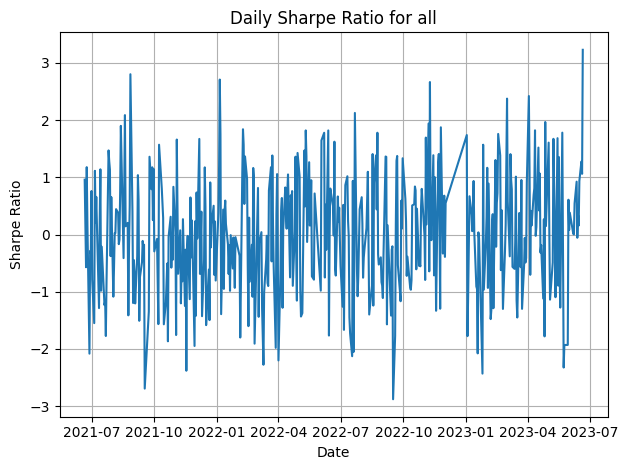

In [46]:
# 결과 시각화
plt.plot(daily_sharpe_ratio)
plt.title('Daily Sharpe Ratio for all')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

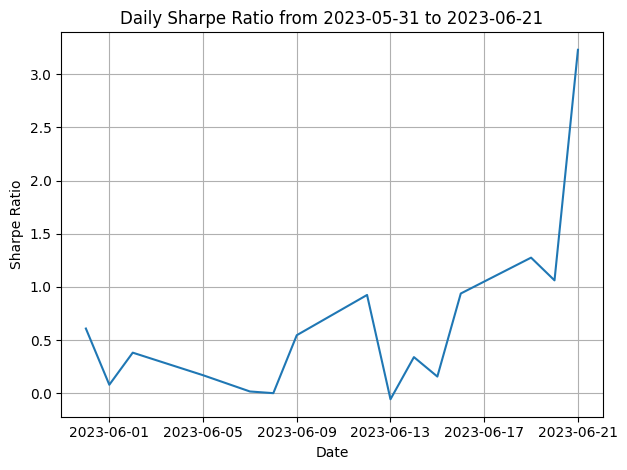

In [47]:
# 결과 시각화
plt.plot(daily_sharpe_ratio_15)
plt.title('Daily Sharpe Ratio from 2023-05-31 to 2023-06-21')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
strategy_cumulative_returns = (1 + strategy_returns).cumprod() - 1

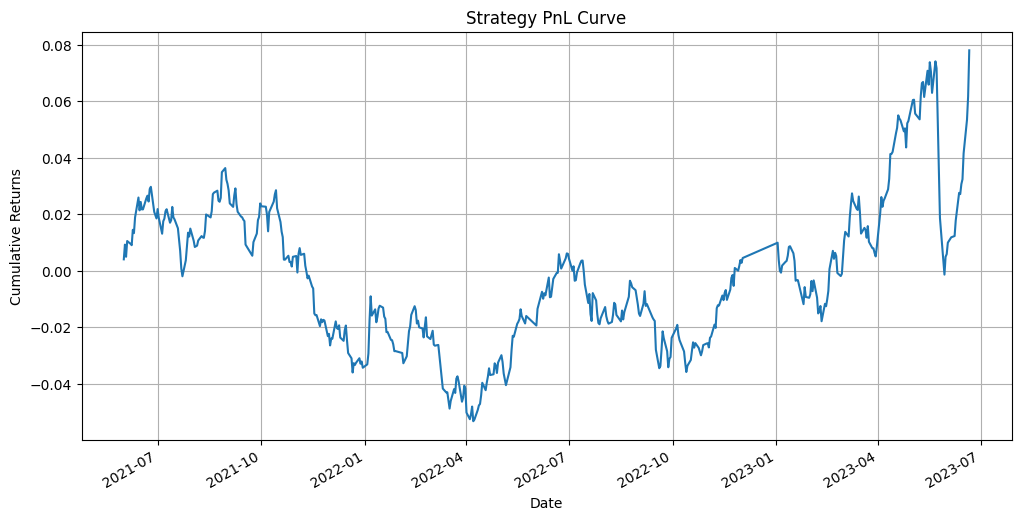

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
strategy_cumulative_returns.plot()
plt.title("Strategy PnL Curve")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.grid(True)
plt.show()


In [50]:
last_15_days_returns = strategy_returns[-15:]
last_15_days_cumulative_returns = (1 + last_15_days_returns).cumprod() - 1

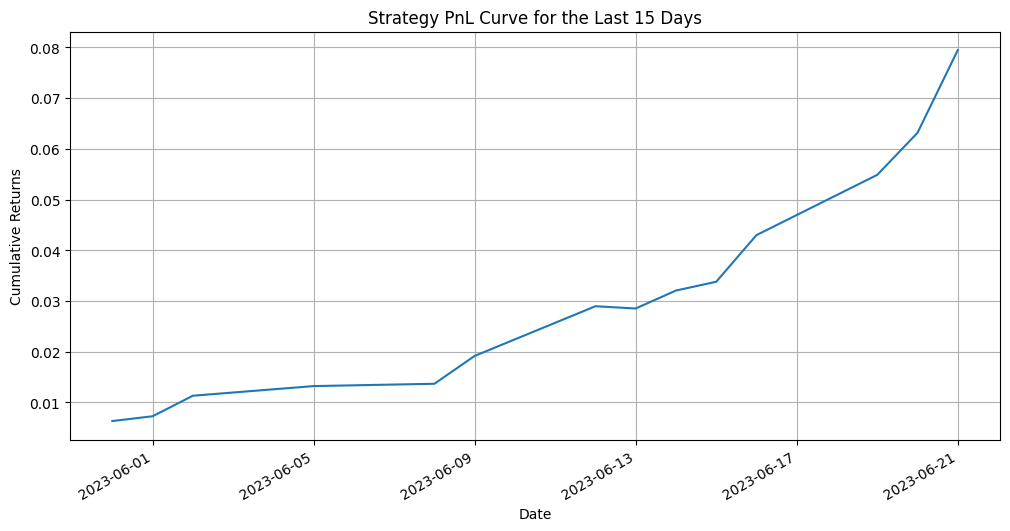

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
last_15_days_cumulative_returns.plot()
plt.title("Strategy PnL Curve for the Last 15 Days")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.grid(True)
plt.show()


In [53]:
last_15_days_returns

trdDd
2023-05-31     0.00632203
2023-06-01    0.000939135
2023-06-02     0.00401967
2023-06-05     0.00187842
2023-06-07    0.000302892
2023-06-08    0.000147885
2023-06-09     0.00541918
2023-06-12      0.0096163
2023-06-13   -0.000435216
2023-06-14     0.00344187
2023-06-15     0.00167513
2023-06-16     0.00890199
2023-06-19      0.0113973
2023-06-20     0.00785633
2023-06-21      0.0153369
dtype: float64

In [52]:
last_15_days_cumulative_returns 

trdDd
2023-05-31   0.00632203
2023-06-01    0.0072671
2023-06-02     0.011316
2023-06-05    0.0132157
2023-06-07    0.0135226
2023-06-08    0.0136724
2023-06-09    0.0191657
2023-06-12    0.0289663
2023-06-13    0.0285185
2023-06-14    0.0320585
2023-06-15    0.0337874
2023-06-16    0.0429901
2023-06-19    0.0548774
2023-06-20    0.0631649
2023-06-21    0.0794706
dtype: float64